In [84]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimize
import scipy.integrate as integrate
from iminuit import Minuit

In [85]:
#Daten einlesen
with open('MagnetfeldKalibrationAbsteigendeSpannung.txt') as data:
    spannung_raw_ab = np.loadtxt(data, usecols= 0)
with open('MagnetfeldKalibrationAbsteigendeSpannung.txt') as data:
    magnetfeldstaerke_ab = np.loadtxt(data, usecols= 1)
with open('MagnetfeldKalibrationAbsteigendeSpannung.txt') as data:
    spannung_transformed_ab = np.loadtxt(data, usecols= 2)

with open('MagnetfeldKalibrationAufsteigendeSpannung.txt') as data:
    spannung_raw_auf = np.loadtxt(data, usecols= 0)
with open('MagnetfeldKalibrationAufsteigendeSpannung.txt') as data:
    magnetfeldstaerke_auf = np.loadtxt(data, usecols= 1)
with open('MagnetfeldKalibrationAufsteigendeSpannung.txt') as data:
    spannung_transformed_auf = np.loadtxt(data, usecols= 2)

with open('MagnetfeldKalibrationNachherAbsteigendeSpannung.txt') as data:
    spannung_raw_ab_nach = np.loadtxt(data, usecols= 0)
with open('MagnetfeldKalibrationNachherAbsteigendeSpannung.txt') as data:
    magnetfeldstaerke_ab_nach = np.loadtxt(data, usecols= 1)
with open('MagnetfeldKalibrationNachherAbsteigendeSpannung.txt') as data:
    spannung_transformed_ab_nach = np.loadtxt(data, usecols= 2)

with open('MagnetfeldKalibrationNachherAufsteigendeSpannung.txt') as data:
    spannung_raw_auf_nach = np.loadtxt(data, usecols= 0)
with open('MagnetfeldKalibrationNachherAufsteigendeSpannung.txt') as data:
    magnetfeldstaerke_auf_nach = np.loadtxt(data, usecols= 1)
with open('MagnetfeldKalibrationNachherAufsteigendeSpannung.txt') as data:
    spannung_transformed_auf_nach = np.loadtxt(data, usecols= 2)

In [86]:
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Linearfit 
def line(x, a, b, c):
    return a + x * b + x**2 * c

#Reduced chi square
def redchisqr(ydata, yfit, deg=2, sd=None):
    # Chi-square statistic  
        if sd==None:  
            chisq=np.sum((ydata-yfit)**2)  
        else:  
            chisq=np.sum( ((ydata-yfit)/sd)**2)  
                
        # Number of degrees of freedom assuming 2 free parameters  
        nu=ydata.size-1-deg  
        
        return chisq/nu       


spannung_fehler = [0.02]* np.size(spannung_raw_auf)
magnetfeld_fehler = [1] * np.size(spannung_raw_auf)


spannung_fehler_ab = [0.02]* np.size(spannung_raw_ab)
magnetfeld_fehler_ab = [1] * np.size(spannung_raw_ab)

Quadrat: -0.2628046731445547
Quadrat Fehler: 0.045044488764545684
Steigung: 22.965953788419554
Steigung Fehler: 0.08908569059691013
Y-Abschnitt: 290.32326626199324
Y-Abschnitt Fehler: 0.2891919965004216
Reduced chi square: 2.230267836362947


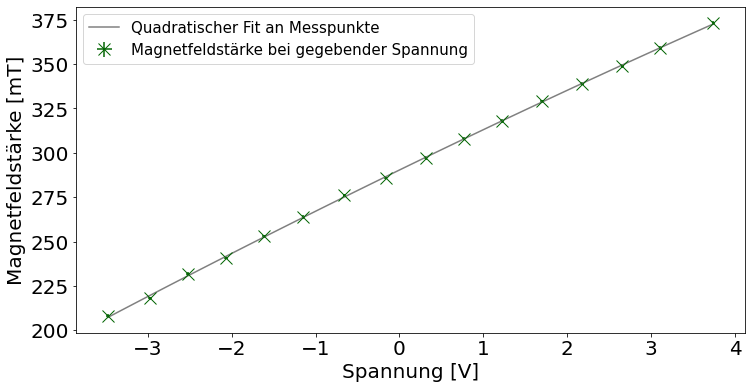

In [87]:
#Magnetfeld fit aufsteigend
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('Spannung [V]', fontsize=20)
ax.set_ylabel('Magnetfeldstärke [mT]', fontsize=20)
#Plotten der unskalierten Kurven
#ax.plot(spannung_transformed_auf, magnetfeldstaerke_auf,'o',markersize=3, color = "lightblue",label = "Magnetfeldkalibrierung bei ansteigender Spannung")

params, cov = optimize.curve_fit(line,spannung_transformed_auf, magnetfeldstaerke_auf)
x_fit = np.linspace(spannung_transformed_auf[0],spannung_transformed_auf[np.size(spannung_transformed_auf)-1])
ax.errorbar(spannung_transformed_auf, magnetfeldstaerke_auf, xerr=spannung_fehler, yerr=magnetfeld_fehler,fmt='x',markersize=12, color = "darkgreen",label = "Magnetfeldstärke bei gegebender Spannung")
y_fit = line(x_fit, params[0], params[1], params[2])
y_fit_chi = line(spannung_transformed_auf, params[0], params[1], params[2])
ax.plot(x_fit, y_fit, color = "grey", label="Quadratischer Fit an Messpunkte")
reduced_chi_sqare = redchisqr(magnetfeldstaerke_auf, y_fit_chi, 1, 1)

print("Quadrat:",params[2])
print("Quadrat Fehler:", np.sqrt(cov[2,2]))
print("Steigung:",params[1])
print("Steigung Fehler:", np.sqrt(cov[1,1]))
print("Y-Abschnitt:", params[0])
print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))
print("Reduced chi square:", reduced_chi_sqare)
 
ax.legend(fontsize=15)
plt.show()
fig.savefig('MagnetfeldfitAnsteigend.png')


Steigung: -0.6583222071837364
Steigung Fehler: 0.033777789130602164
Steigung: 22.369402168899576
Steigung Fehler: 0.06618754015141252
Y-Abschnitt: 296.62299419018615
Y-Abschnitt Fehler: 0.18883383300803758
Reduced chi square: 0.8995326381521469


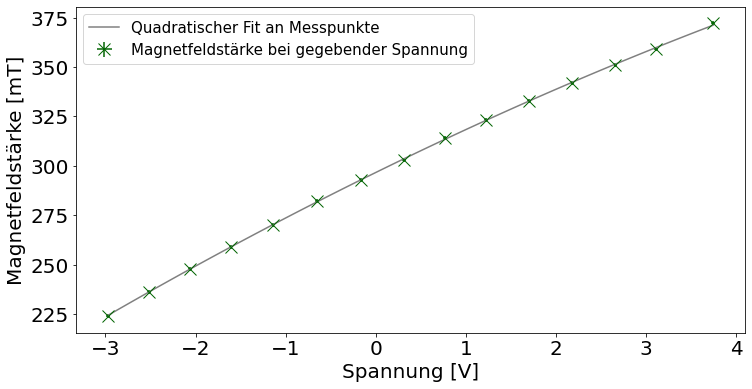

In [88]:
#Magnetfeld fit absteigend
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('Spannung [V]', fontsize=20)
ax.set_ylabel('Magnetfeldstärke [mT]', fontsize=20)
#Plotten der unskalierten Kurven
#ax.plot(spannung_transformed_ab, magnetfeldstaerke_ab,'o',markersize=3, color = "lightblue",label = "Magnetfeldkalibrierung bei ansteigender Spannung")

params, cov = optimize.curve_fit(line,spannung_transformed_ab, magnetfeldstaerke_ab)
x_fit = np.linspace(spannung_transformed_ab[0],spannung_transformed_ab[np.size(spannung_transformed_ab)-1])
ax.errorbar(spannung_transformed_ab, magnetfeldstaerke_ab, xerr=spannung_fehler_ab, yerr=magnetfeld_fehler_ab,fmt='x',markersize=12, color = "darkgreen",label = "Magnetfeldstärke bei gegebender Spannung")
y_fit = line(x_fit, params[0], params[1], params[2])
y_fit_chi = line(spannung_transformed_ab, params[0], params[1], params[2])
ax.plot(x_fit, y_fit, color = "grey", label="Quadratischer Fit an Messpunkte")
reduced_chi_sqare = redchisqr(magnetfeldstaerke_ab, y_fit_chi, 1, 1)

print("Steigung:",params[2])
print("Steigung Fehler:", np.sqrt(cov[2,2]))
print("Steigung:",params[1])
print("Steigung Fehler:", np.sqrt(cov[1,1]))
print("Y-Abschnitt:", params[0])
print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))
print("Reduced chi square:", reduced_chi_sqare)

ax.legend(fontsize=15)
plt.show()
fig.savefig('MagnetfeldfitAbsteigend.png')

Quadrat: -0.4561649654118758
Quadrat Fehler: 0.06504569077181675
Steigung: 23.781510183420476
Steigung Fehler: 0.12878199045645677
Y-Abschnitt: 291.0187611468045
Y-Abschnitt Fehler: 0.41971110884805896
Reduced chi square: 1.1778711336480343


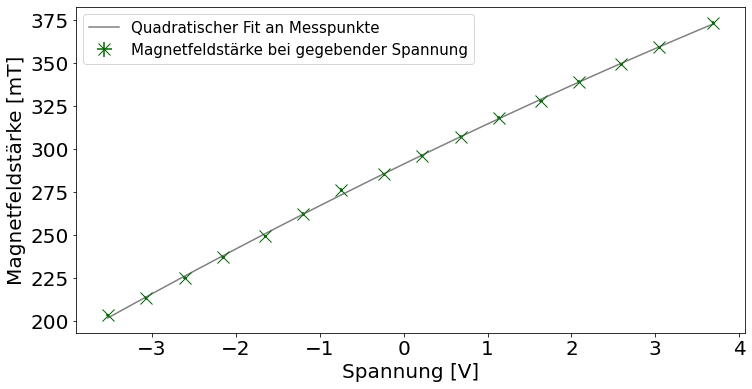

In [89]:
#Magnetfeld fit aufsteigend nachher
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('Spannung [V]', fontsize=20)
ax.set_ylabel('Magnetfeldstärke [mT]', fontsize=20)
#Plotten der unskalierten Kurven
#ax.plot(spannung_transformed_auf_nach, magnetfeldstaerke_auf_nach,'o',markersize=3, color = "lightblue",label = "Magnetfeldkalibrierung bei ansteigender Spannung nach Experiment")

params, cov = optimize.curve_fit(line,spannung_transformed_auf_nach, magnetfeldstaerke_auf_nach)
x_fit = np.linspace(spannung_transformed_auf_nach[0],spannung_transformed_auf_nach[np.size(spannung_transformed_auf_nach)-1])
ax.errorbar(spannung_transformed_auf_nach, magnetfeldstaerke_auf_nach, xerr=spannung_fehler, yerr=magnetfeld_fehler,fmt='x',markersize=12, color = "darkgreen",label = "Magnetfeldstärke bei gegebender Spannung")
y_fit = line(x_fit, params[0], params[1], params[2])
y_fit_chi = line(spannung_transformed_auf_nach, params[0], params[1], params[2])
ax.plot(x_fit, y_fit, color = "grey", label="Quadratischer Fit an Messpunkte")
reduced_chi_sqare = redchisqr(magnetfeldstaerke_auf_nach, y_fit_chi, 1, 1)

print("Quadrat:",params[2])
print("Quadrat Fehler:", np.sqrt(cov[2,2]))
print("Steigung:",params[1])
print("Steigung Fehler:", np.sqrt(cov[1,1]))
print("Y-Abschnitt:", params[0])
print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))
print("Reduced chi square:", reduced_chi_sqare)

ax.legend(fontsize=15)
plt.show()
fig.savefig('MagnetfeldfitAnsteigendNachher.png')

Quadrat: -0.6417623880468643
Quadrat Fehler: 0.0373212350738985
Steigung: 22.204393042667935
Steigung Fehler: 0.07389118909372736
Y-Abschnitt: 299.20943792930575
Y-Abschnitt Fehler: 0.2408174036350404
Reduced chi square: 0.3877687550294006


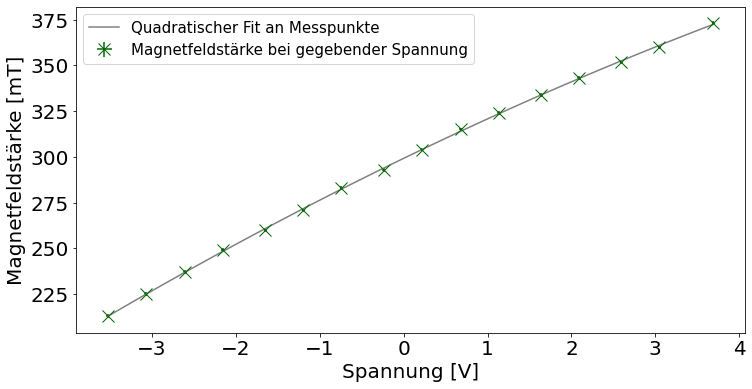

In [90]:
#Magnetfeld fit absteigend nachher
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('Spannung [V]', fontsize=20)
ax.set_ylabel('Magnetfeldstärke [mT]', fontsize=20)
#Plotten der unskalierten Kurven
#ax.plot(spannung_transformed_ab, magnetfeldstaerke_ab,'o',markersize=3, color = "lightblue",label = "Magnetfeldkalibrierung bei ansteigender Spannung")

params, cov = optimize.curve_fit(line,spannung_transformed_ab_nach, magnetfeldstaerke_ab_nach)
x_fit = np.linspace(spannung_transformed_ab_nach[0],spannung_transformed_ab_nach[np.size(spannung_transformed_ab_nach)-1])
ax.errorbar(spannung_transformed_ab_nach, magnetfeldstaerke_ab_nach, xerr=spannung_fehler, yerr=magnetfeld_fehler,fmt='x',markersize=12, color = "darkgreen",label = "Magnetfeldstärke bei gegebender Spannung")
y_fit = line(x_fit, params[0], params[1], params[2])
y_fit_chi = line(spannung_transformed_ab_nach, params[0], params[1], params[2])
ax.plot(x_fit, y_fit, color = "grey", label="Quadratischer Fit an Messpunkte")
reduced_chi_sqare = redchisqr(magnetfeldstaerke_ab_nach, y_fit_chi, 1, 1)

print("Quadrat:",params[2])
print("Quadrat Fehler:", np.sqrt(cov[2,2]))
print("Steigung:",params[1])
print("Steigung Fehler:", np.sqrt(cov[1,1]))
print("Y-Abschnitt:", params[0])
print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))
print("Reduced chi square:", reduced_chi_sqare)

ax.legend(fontsize=15)
plt.show()
fig.savefig('MagnetfeldfitAbsteigendNachher.png')